<a href="https://colab.research.google.com/github/pabloinsente/CovNet_Human_Drawings/blob/master/code/age_by_cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import pandas as pd

In [2]:
# Clone the data into Colab
# ! git clone https://github.com/pabloinsente/CovNet_Human_Drawings

Cloning into 'CovNet_Human_Drawings'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 664 (delta 5), reused 0 (delta 0), pack-reused 652
Receiving objects: 100% (664/664), 96.53 MiB | 40.93 MiB/s, done.
Resolving deltas: 100% (187/187), done.


In [3]:
# read metadata as pandas dataframe
meta_path= "CovNet_Human_Drawings/data/merged_dataframes_prediction/predict_age_from_vectors_block5_pool_all_imp.csv"
df_metadata = pd.read_csv(meta_path, sep=",")

# read clusters as pandas dataframe
cluster_path= "CovNet_Human_Drawings/data/cluster_dataframes/h_clusters_8_drawings_block5_pool_all.csv"
df_cluster = pd.read_csv(cluster_path, sep=",")

print(df_metadata.shape)
print(df_cluster.shape)
print(df_metadata.iloc[0:5,0:5])
print(df_cluster.iloc[0:5,0:5])

(258, 25091)
(258, 3)
       id  age_yr  adult  vector_0  vector_1
0  DAM001    5.70    0.0       0.0       0.0
1  DAM001    5.70    0.0       0.0       0.0
2  DAM001    5.70    0.0       0.0       0.0
3  DAM002    5.42    0.0       0.0       0.0
4  DAM002    5.42    0.0       0.0       0.0
   Unnamed: 0  clusters_np             filenames_np
0           0            7     DAM024_P_DAP_KID.jpg
1           1            4     DAM081_P_DAP_KID.jpg
2           2            6  DAMa016_T_DAP_ADULT.jpg
3           3            4     DAM064_P_DAP_KID.jpg
4           4            3     DAM013_F_DAP_KID.jpg


In [4]:
# extract and crop filename vector
filenames_crop = []
file_names = df_cluster["filenames_np"]
file_len = len(df_cluster["filenames_np"])
[filenames_crop.append(file_names[id].split('_')[0]) for id in range(file_len)]
print(filenames_crop[0:5])
print(len(filenames_crop))

['DAM024', 'DAM081', 'DAMa016', 'DAM064', 'DAM013']
258


In [5]:
# There is "a" in the filenames. To merge this dataframe with the metadata, 
# we need to change that to uppercasem e.g. DAMa025 needs to change to DAMA025
filenames_up = [x.upper() for x in filenames_crop]
print(filenames_up[0:5])
print(len(filenames_up)) # this should yield 258

['DAM024', 'DAM081', 'DAMA016', 'DAM064', 'DAM013']
258


In [6]:
filenames_up = pd.DataFrame(filenames_up, columns =['id']) 
df_clusters = pd.concat([filenames_up, df_cluster], axis=1)
cols = [1,3]
#drop index and old filenames
df_clusters.drop(df_clusters.columns[cols],axis=1,inplace=True) 
print(df_clusters.head())
print(len(df_clusters)) # this should yield 258

        id  clusters_np
0   DAM024            7
1   DAM081            4
2  DAMA016            6
3   DAM064            4
4   DAM013            3
258


In [7]:
# subset metadata; get id and age columns
df_metadata = df_metadata[['id','age_yr', 'adult']]
print(df_metadata.shape)
df_metadata.sort_values(by=['id'])[0:5]

(258, 3)


,id,age_yr,adult
0,DAM001,5.70,0.0
1,DAM001,5.70,0.0
2,DAM001,5.70,0.0
3,DAM002,5.42,0.0
4,DAM002,5.42,0.0


In [8]:
# reset index 
df_metadata = df_metadata.reset_index(drop=True)
df_clusters = df_clusters.reset_index(drop=True)

# merge metadata and clusters by id
df_clusters_age = pd.merge(df_metadata, df_clusters, on=['id'])
print(df_clusters_age.shape) 
print(df_clusters_age[0:10])

(678, 4)
       id  age_yr  adult  clusters_np
0  DAM001    5.70    0.0            1
1  DAM001    5.70    0.0            4
2  DAM001    5.70    0.0            7
3  DAM001    5.70    0.0            1
4  DAM001    5.70    0.0            4
5  DAM001    5.70    0.0            7
6  DAM001    5.70    0.0            1
7  DAM001    5.70    0.0            4
8  DAM001    5.70    0.0            7
9  DAM002    5.42    0.0            1


In [ ]:
df_clusters_age.to_csv("age_clusters_merged.csv", sep=',')

In [47]:
df_mean_sd = df_clusters_age.groupby("clusters_np")["age_yr"].agg([np.mean, np.std])
df_mean_sd

,mean,std
clusters_np,,
0,4.148813,2.962651
1,7.847219,6.124862
2,20.676250,1.115048
3,6.701275,4.922543
4,5.332912,4.536147
5,19.650000,0.185903
6,12.998182,7.950278
7,3.658291,0.929691


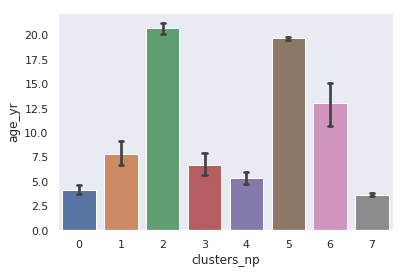

In [66]:
sns.set_style("dark")
sns.despine()
barplot = sns.barplot(x="clusters_np", y="age_yr",capsize=.1, data=df_clusters_age)